In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instruction to the notebook stating warning should not be displayed
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
adfile = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [3]:
df = pd.read_csv("BostonHousing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.corr()  

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


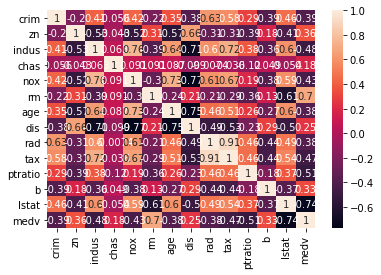

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
# Consider highly correlated value, here rm
x = df[['rm']]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [9]:
# Generate slope and intercept
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)

Slope =  [9.32231225]
Intercept =  -35.87458664334984


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_hat = lr.predict(x_test)
residuals = y_test - y_hat
rss = (residuals ** 2).sum()

In [11]:
rss

6739.771955185614

In [12]:
mean_squared_error(y_test, y_hat)

44.34060496832641

In [13]:
r2_score(y_test, y_hat)  #R2 score is too loo.

0.41640415480648896

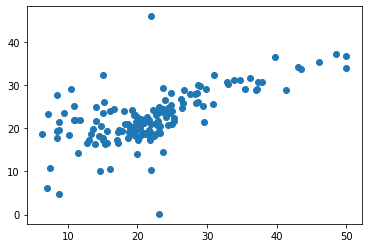

In [14]:
plt.scatter(y_test, y_hat) # plot actual house price vs predicted house price
plt.show()

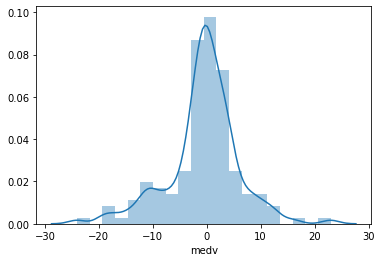

In [15]:
sns.distplot(residuals, bins=20) # residuals are disrtibuted normally with few outliers
plt.show()

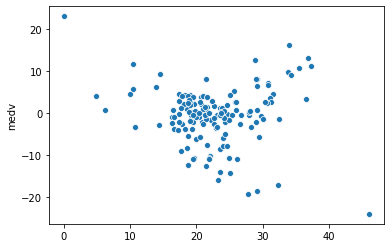

In [16]:
sns.scatterplot(y_hat, residuals) # residuals are hetroskedistical
plt.show()

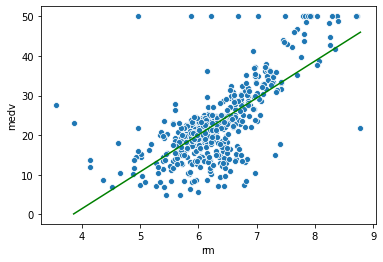

In [17]:
# Data is linear
sns.scatterplot(data=df, x="rm", y="medv")  
sns.lineplot(x_test['rm'].to_list(), y_hat, color="green")
plt.show()

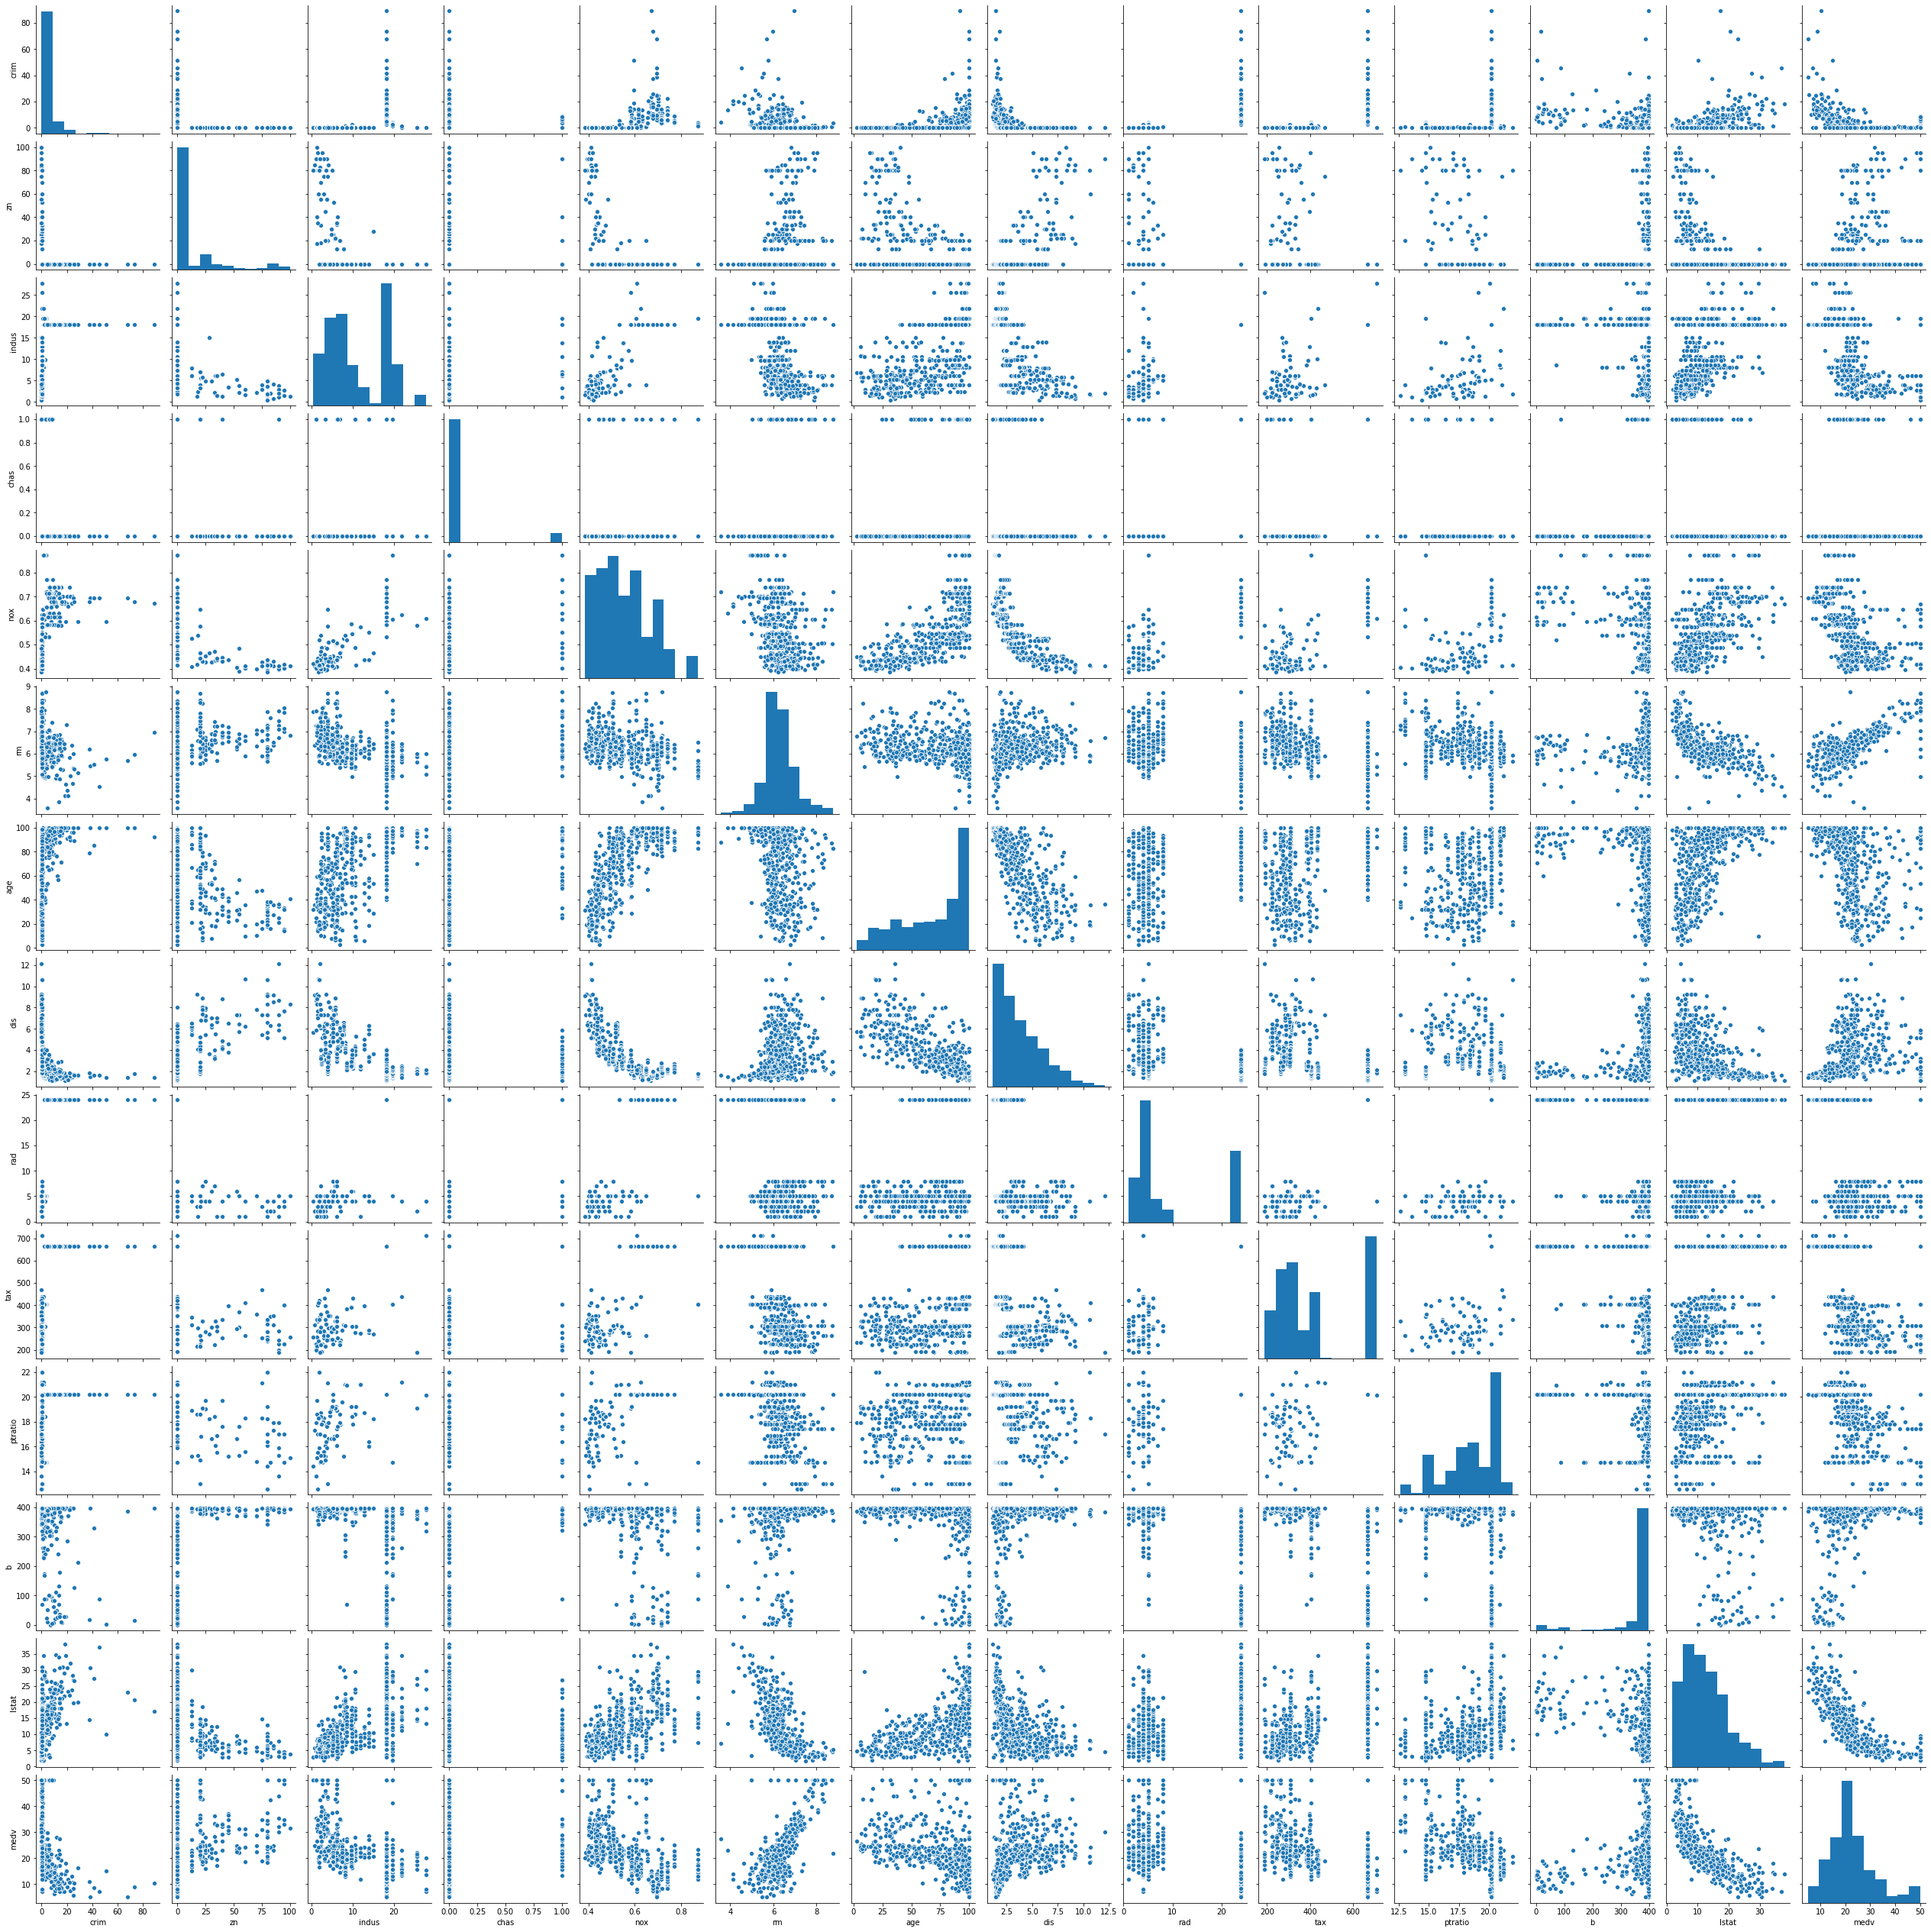

In [18]:
# Check multicolinearity - multicolinarity exists
sns.pairplot(df)
plt.show()

3 conditions fails. So check for multiple linear regression

In [22]:
# Multiple Linear Regression
# Case 1: x1 = rm, x2 = lstat, x3 = ptratio
x = df[['rm', 'lstat', 'ptratio']]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals1 = y_test - y_hat

Intercept = 23.02762805151349 
 Slope = [ 4.07880595 -0.61207495 -0.98404368]
MSE = 26.8639014636058 
 R2 = 0.6488670674000725


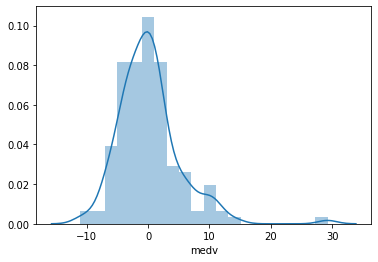

In [25]:
sns.distplot(residuals1, bins=20) # Normal Distribution, +ve skewness
plt.show()

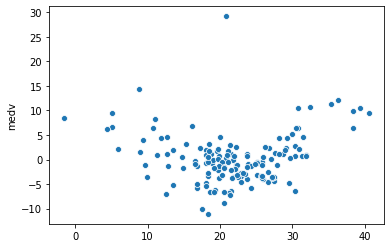

In [27]:
sns.scatterplot(y_hat, residuals1) # hetroskedistical - not in line
plt.show()

In [23]:
#Case 2: x1 = rm, x2 = lstat
x = df[['rm', 'lstat']]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals1 = y_test - y_hat

Intercept = -4.567252452837607 
 Slope = [ 5.48594694 -0.58733426]
MSE = 26.117468849900618 
 R2 = 0.6813769056260296


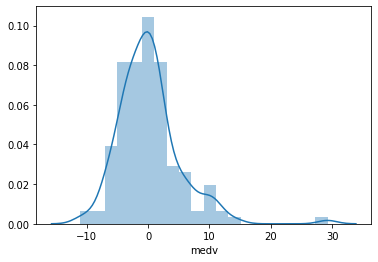

In [24]:
sns.distplot(residuals1, bins=20) # Normal Distribution, +ve skewness
plt.show()

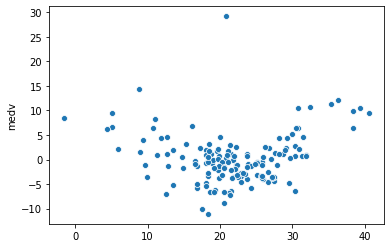

In [26]:
sns.scatterplot(y_hat, residuals1) # hetroskedistical - not in line
plt.show()

In [28]:
#Case 3: x1 = lstat
x = df[['lstat']]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept = {} \n Slope = {}".format(lr.intercept_, lr.coef_))
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals1 = y_test - y_hat

Intercept = 35.161768386744455 
 Slope = [-1.00141383]
MSE = 34.71643242242352 
 R2 = 0.5304017298094336


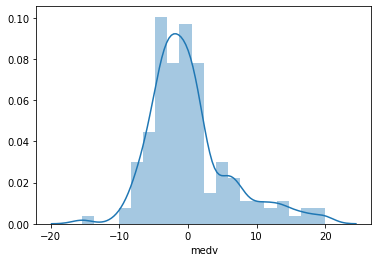

In [29]:
sns.distplot(residuals1, bins=20) # Normal Distribution, +ve skewness
plt.show()

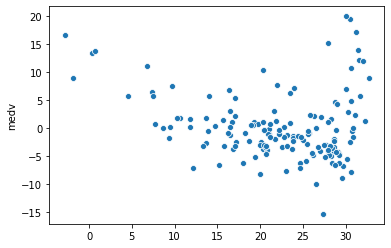

In [30]:
sns.scatterplot(y_hat, residuals1) # hetroskedistical - not in line
plt.show()

In [34]:
# For case 2, we consider
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x = df[['rm', 'lstat']]
y = df['medv']
pf = PolynomialFeatures(2) #Degree 2, theta0, x0, x1,x2
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

# Final Model: 1.Data is linear  2. Residuals are normally distributed  3. R2_score is good

MSE = 19.842115428385316 
 R2 = 0.7677849353130162


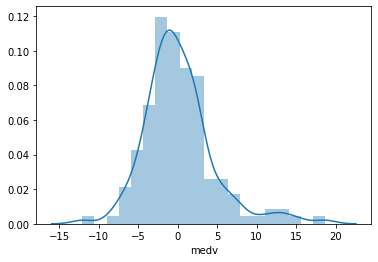

In [35]:
sns.distplot(residuals, bins=20) # Normally distributed,3rd condition true
plt.show()

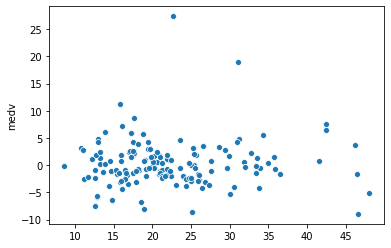

In [38]:
sns.scatterplot(y_hat, residuals) # hetroskedistical. i.e fourth condition fails
plt.show()

MSE = 18.097634399703143 
 R2 = 0.7834873552082371


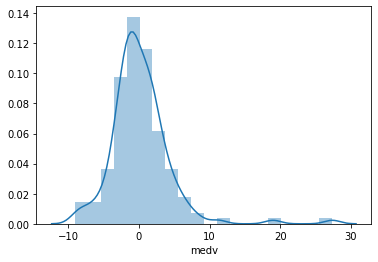

In [36]:
pf = PolynomialFeatures(3) #Degree 3, 
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat
sns.distplot(residuals, bins=20)
plt.show()

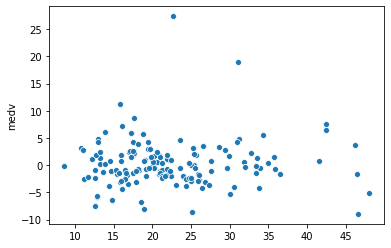

In [37]:
sns.scatterplot(y_hat, residuals) # hetroskedistical. i.e fourth condition fails
plt.show()